# Plotting genes with `refflat`

_By Anthony Aylward, 2019-03-11_

This vignette will cover a simple example use case for `refflat`: plotting
gene locations beneath GWAS association values, to provide context for the
locus.

Import the libraries we'll need.

In [2]:
library(RColorBrewer)
library(refflat)

Get a couple of good colors using [RColorBrewer](https://cran.r-project.org/web/packages/RColorBrewer/index.html).

In [3]:
palette <- brewer.pal(3, "Paired")[1:2]

`refflat` includes an example data frame called `t2d_fto`, which contains
P-values of GWAS association (type 2 diabetes risk) for SNPs in a region of
roughly 1 Mb around the _FTO_ gene. See `help(t2d_fto)` for details.

Now we can create the plot. We'll use `par` to divide the plot into two
sections, invoke a basic `plot` call to plot the GWAS association data,
then invoke `plot_refflat` to plot the gene locations.

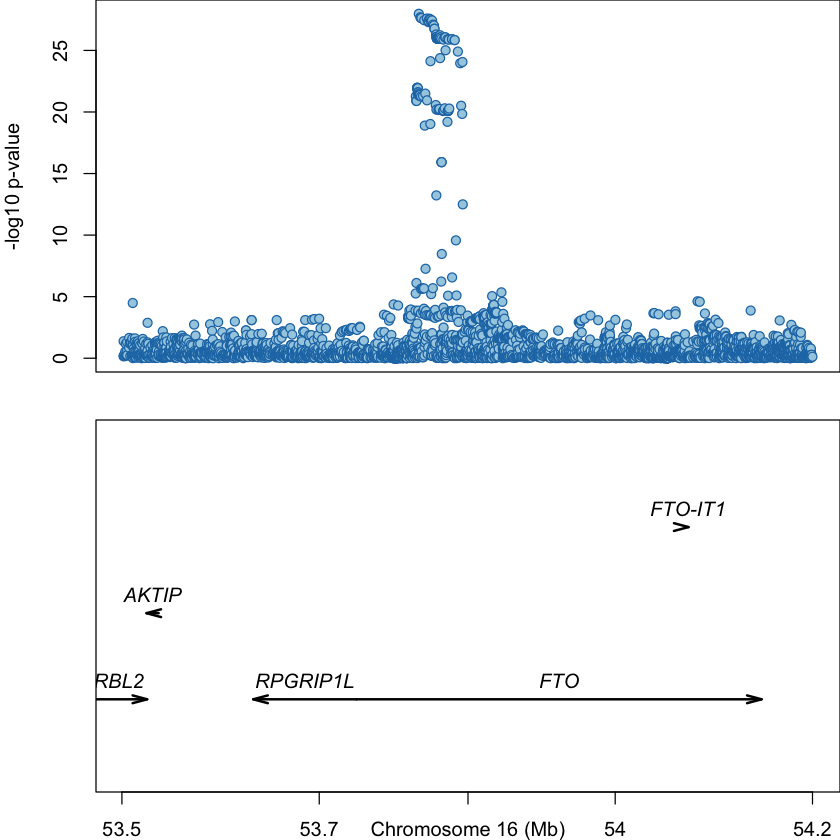

In [4]:
par(mar = c(2, 4, 0, 0), mfcol = c(2, 1))
plot(
  t2d_fto[["POS"]],
  -1 * log10(t2d_fto[["PVALUE"]]),
  pch = 21,
  col = palette[2],
  bg = palette[1],
  xlab = "",
  xaxt = "n",
  ylab = "-log10 p-value"
)
plot_refflat("chr16", t2d_fto[1, "POS"], t2d_fto[nrow(t2d_fto), "POS"])

Note that the transcription start sites of _RPGRIP1L_ and _FTO_ are very close
to one another. We can clarify things by imposing a 1 kb buffer around genes,
requiring that they be drawn at different y-axis levels if their ends are less
than 1 kb apart.

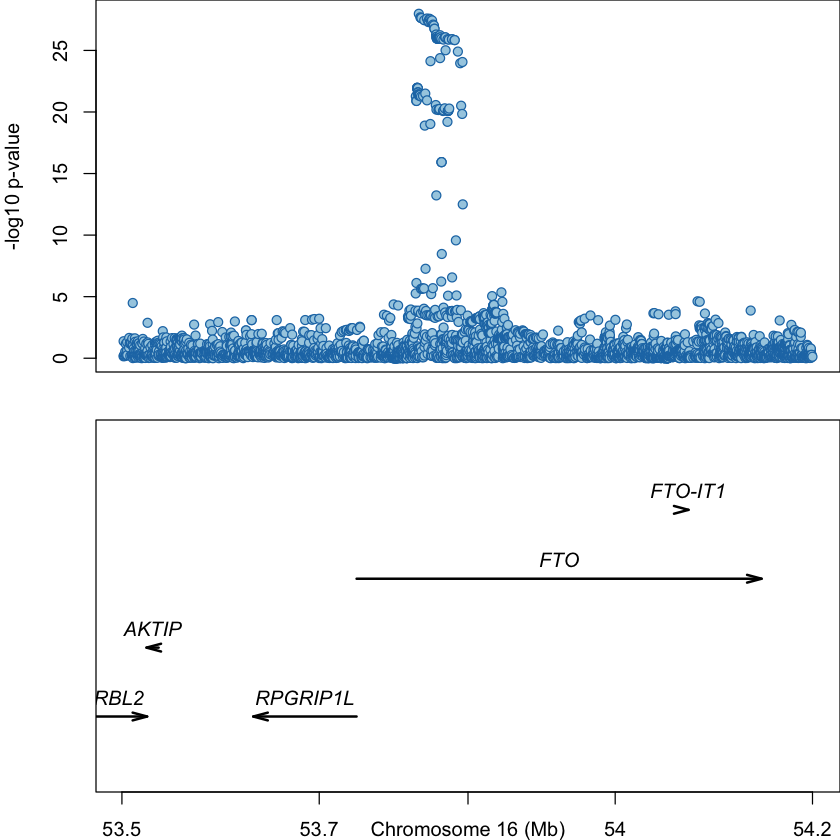

In [5]:
par(mar = c(2,4,0,0), mfcol = c(2, 1))
plot(
  t2d_fto[["POS"]],
  -1 * log10(t2d_fto[["PVALUE"]]),
  pch = 21,
  col = palette[2],
  bg = palette[1],
  xlab = "",
  xaxt = "n",
  ylab = "-log10 p-value"
)
plot_refflat(
  "chr16",
  t2d_fto[1, "POS"],
  t2d_fto[nrow(t2d_fto), "POS"],
  buffer = 1e3
)

Finally, we can do some more drawing on the lower panel. For example, to draw
a vertical line at the position of the lead SNP:

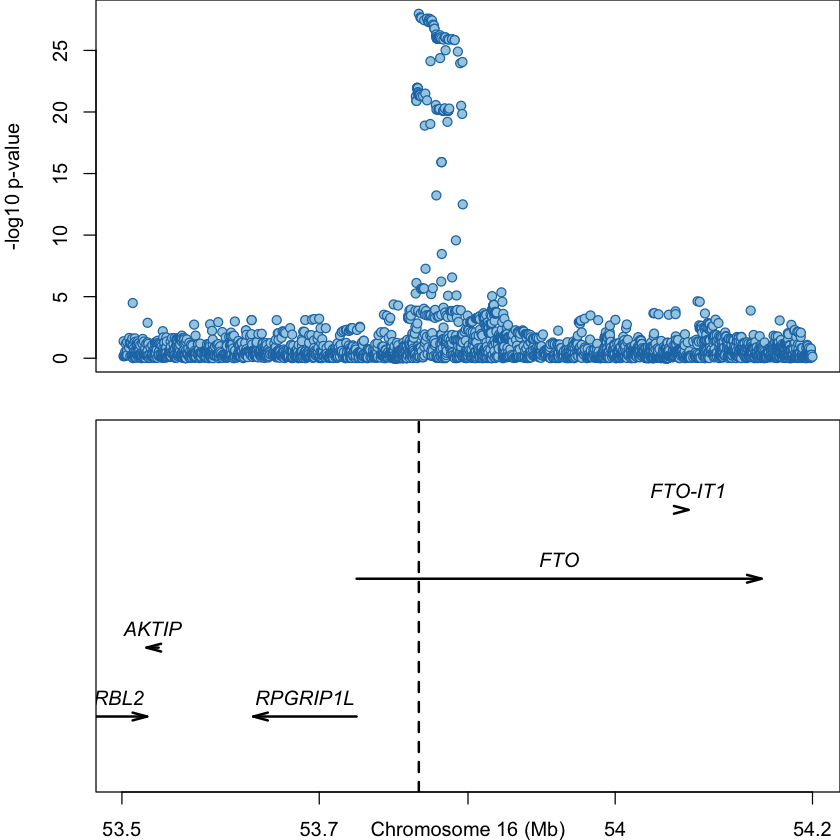

In [6]:
lead_snp_position = t2d_fto[
  t2d_fto[["PVALUE"]] == min(t2d_fto[["PVALUE"]]),
  "POS"
]
par(mar = c(2,4,0,0), mfcol = c(2, 1))
plot(
  t2d_fto[["POS"]],
  -1 * log10(t2d_fto[["PVALUE"]]),
  pch = 21,
  col = palette[2],
  bg = palette[1],
  xlab = "",
  xaxt = "n",
  ylab = "-log10 p-value"
)
plot_refflat(
  "chr16",
  t2d_fto[1, "POS"],
  t2d_fto[nrow(t2d_fto), "POS"],
  buffer = 1e3
)
abline(v = lead_snp_position, lty = 2, lwd = 2)